In [152]:
import numpy as np
import math
from matplotlib import cm
import matplotlib.pyplot as plt

case = ['h5','h8','h10','h20']
file = ['10000','10000','10000','15000']
head ='/home/haoyan/Desktop/ML-CFD/CASE/PHill/Grid-iretation-independency/'
i = [50,93,140,180]
j = [65,100,150,200]
number = [70*65,93*100,140*150,180*200]
%matplotlib inline

In [153]:
def reading_field(head,name,n_package,file_name,i):#Reading the raw vector data
    file = head +name +'/'+ n_package + '/' + file_name
    raw_data = []
    number = (i)
    with open(file) as f:
        for line in f:
            line = line.strip('\n')
            raw_data.append(line)
    data_str = (raw_data[23:(23+number)])
    data  = [float(i) for i in data_str]
    data = np.array(data)
    return data

def reading_tau_w(head,name,n_package,file_name,i): # Reading second-rank tensor in OpenFoam field
    file = head +name +'/'+ n_package + '/' + file_name
    raw_data = []
    number = i
    with open(file) as f:
        for line in f:
            line = line.strip('\n ()')
            raw_data.append(line)
    sequence = 36 + 2 + number +2+ 5 + 2
    #sequence = 36 + 2
    data_str = raw_data[sequence:(sequence+number)]
    tensors = np.zeros((number,3))
    for i in range(number):
        element = np.array([float(i) for i in data_str[i].split()])
        tensors[i] = element
    U = tensors[:,0]
    V = tensors[:,1]
    
    return (U+V)

In [154]:
x_h20 = reading_field(head,case[3],file[3],'Cx',i[3])*1000/28
tau_w_h20 = reading_tau_w(head,case[3],file[3],'wallShearStress',i[3])
x_h10 = reading_field(head,case[2],file[2],'Cx',i[2])*1000/28
tau_w_h10 = reading_tau_w(head,case[2],file[2],'wallShearStress',i[2])
x_h8 = reading_field(head,case[1],file[1],'Cx',i[1])*1000/28
tau_w_h8 = reading_tau_w(head,case[1],file[1],'wallShearStress',i[1])
x_h5 = reading_field(head,case[0],file[0],'Cx',i[0])*1000/28
tau_w_h5 = reading_tau_w(head,case[0],file[0],'wallShearStress',i[0])

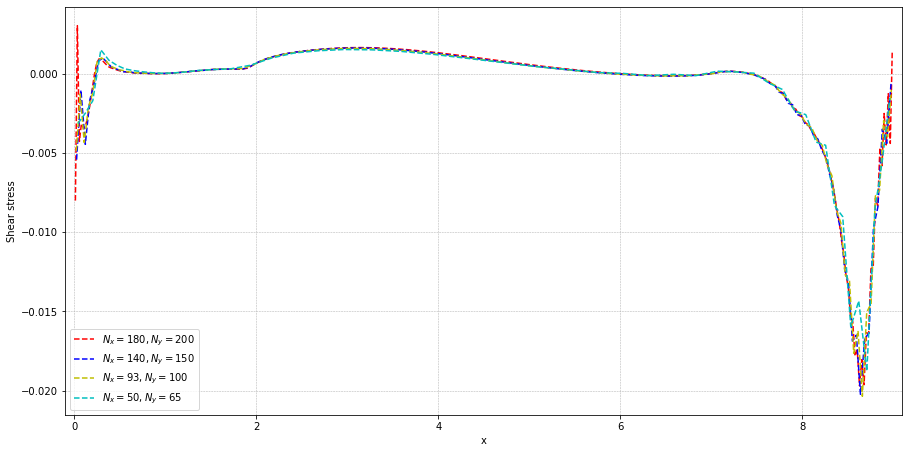

In [165]:
plt.figure(figsize=(15,7.5))
plt.plot(x_h20,tau_w_h20,color='r',linestyle='--',label='$N_x=180,N_y=200$')
plt.plot(x_h10,tau_w_h10,color='b',linestyle='--',label='$N_x=140,N_y=150$')
plt.plot(x_h8,tau_w_h8,color='y',linestyle='--',label='$N_x=93,N_y=100$')
plt.plot(x_h5,tau_w_h5,color='c',linestyle='--',label='$N_x=50,N_y=65$')
plt.xlabel('x')
plt.ylabel('Shear stress')
plt.xlim(-0.1,9.1)
#plt.ylim(-0.01,0.005)
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)